# Import Packages

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


In [75]:
d1 = pd.read_csv("regression_data_node1.csv")
d2 = pd.read_csv("regression_data_node2.csv")
d3 = pd.read_csv("regression_data_node3.csv")
test = pd.read_csv("test_data.csv")

In [95]:
# Split Dataset
def split(X):
    n, _ = X.shape
    i = int(n * 0.8)

    X_train = X.drop(columns = ['y'])[:i]
    X_val = X.drop(columns = ['y'])[i:]
    
    y_train = X['y'][:i]
    y_val = X['y'][i:]

    return np.array(X_train), np.array(X_val), y_train, y_val

d1_train, d1_val, y1_train, y1_val = split(d1)
d2_train, d2_val, y2_train, y2_val = split(d2)
d3_train, d3_val, y3_train, y3_val = split(d3)
test_X = test.drop(columns = ['y'])
test_y = test['y']
beta_0 = np.zeros(d1_train.shape[1])
    
    
    

# Part (a)

- implement coordinate descent with lasso
- validate using different $\lambda$ parameters
- Report the values of the regularization parameter λ that yielded the best models 
for each of the three data sets, based on validation loss
- get test loss for each model s

## Function for Coordinate Descent

In [79]:
#Loss function
def sse(X, y, beta):
        return np.sum((X @ beta - y) ** 2) / (2 * X.shape[0])

#Proximal Function
def prox(inp, lmb):
    if inp > lmb:
        return inp - lmb
    elif inp < -lmb:
        return inp + lmb
    else:
        return 0

#Lasso Coordinate Descent
def lasso_coordinate_descent(X, y, lmb, beta_0, iter = 10, tol = 1e-4):
    n, p = X.shape 
    beta = beta_0.copy()
    

    for _ in range(iter):
        
        beta_old = beta.copy()
        for j in range(p):
            #exclude j
            Xj = np.delete(X, j, axis = 1)
            betaj = np.delete(beta, j)

            #calculate betaj
            rj = y - Xj @ betaj
            numer = rj.T @ X[:, j]
            denom = X[:, j].T @ X[:, j]

            #lasso implementation
            beta[j] = prox(numer, lmb) / denom
            
        if np.linalg.norm(beta - beta_old) < tol:
            break

    return beta
    

## Function for hyperparameter tuning

In [80]:
# input: X_train, y_train, X_val, y_val, smallest lambda, largest lambda, how many lambdas to test
# output: beta, lambda
# iterate through each lambda to find the smallest sse

lambdas = np.linspace(12, 84, 10) #range for lambda

def lambda_tuning(X_train, y_train, X_val, y_val, lambdas, beta_0, iter = 10):
    
    result = {}
    beta_val = {}
    for l in lambdas: #run coordinate descent for each lambda in range
        beta_init = beta_0.copy()
        beta = lasso_coordinate_descent(X_train, y_train, l, beta_init, iter, 1e-4)
        result[l] = sse(X_val, y_val, beta) #store sse results corresponding to lambda
        beta_val[l] = beta.copy() 
        
    l_star = min(result, key=result.get) #grab lambda with lowest loss value

    return beta_val[l_star], l_star, result[l_star]

## Run Functions

In [81]:
beta_d1, lambda_d1, loss_d1 = lambda_tuning(d1_train, y1_train, d1_val, y1_val, lambdas, beta_0)
beta_d2, lambda_d2, loss_d2 = lambda_tuning(d2_train, y2_train, d2_val, y2_val, lambdas, beta_0)
beta_d3, lambda_d3, loss_d3 = lambda_tuning(d3_train, y3_train, d3_val, y3_val, lambdas, beta_0)

In [82]:
print("-----d1 values-----")
print(f"lambda = {lambda_d1}")
print(f"Validation loss = {loss_d1}")

print("-----d2 values-----")

print(f"lambda = {lambda_d2}")
print(f"Validation loss = {loss_d2}")

print("-----d3 values-----")

print(f"lambda = {lambda_d3}")
print(f"Validation loss = {loss_d3}")

-----d1 values-----
lambda = 36.0
Validation loss = 33.747818298085754
-----d2 values-----
lambda = 76.0
Validation loss = 38.10561620759369
-----d3 values-----
lambda = 76.0
Validation loss = 16.771160448498886


### (2)

In [83]:
print(f"Non-zero indices for dataset 1: {np.where(beta_d1 != 0)[0]}")
print(f"Non-zero indices for dataset 2: {np.where(beta_d2 != 0)[0]}")
print(f"Non-zero indices for dataset 3: {np.where(beta_d3 != 0)[0]}")

Non-zero indices for dataset 1: [  5   6  14  15  20  25  32  36  37  40  47  58  61  75  76  80  85  91
 106 108 112 115 116 117 123 125 126 128 132 134 135 137 138 151 168 169
 171 172 174 186 193 199 201 202 204 207 209 212 216 219 225 228 229 230
 231 232 235 249 253 260 262 265 266 267 268 284 291 298 299 300 305 311
 312 315 317 322 323 324 326 342 346 350 351 360 362 363 364 365 372 374
 378 381 387 389 396 399 400 402 405 409 414 420 423 427 429 440 447 458
 461 465 469 471 473 481 491 492 493 496 498 499 500 507 508 509 510 513
 514 526 530 532 535 541 544 545 550 559 566 569 574 577 583 587 590 591
 596]
Non-zero indices for dataset 2: [  4   6   8  14  18  26  30  34  35  36  40  52  61  65  71  77  78  90
  93  94  97  98 104 109 111 117 118 123 125 130 135 136 144 148 153 161
 165 173 182 204 210 212 218 220 223 224 227 231 237 249 266 269 274 281
 285 289 294 299 304 305 306 307 308 311 315 329 333 345 350 351 356 360
 362 369 391 396 399 400 411 412 413 423 425 430 431 4

### (3)

In [108]:
nonzero_indices = np.where((beta_d1 != 0) & (beta_d2 != 0) & (beta_d3 != 0))[0]
print(f"Indices that are not zero across all three models are: {zero_indices}")

Indices that are not zero across all three models are: [  6  14  40 117 123 125 249 266 299 305 311 362 399 400 423 447 461 471
 493 500 526 541 545 559 569 587]


### (4)

In [85]:
test_loss_d1 = sse(test_X, test_y, beta_d1)
test_loss_d2 = sse(test_X, test_y, beta_d2)
test_loss_d3 = sse(test_X, test_y, beta_d3)
print(f"Dataset 1 test loss = {test_loss_d1}")
print(f"Dataset 2 test loss = {test_loss_d2}")
print(f"Dataset 3 test loss = {test_loss_d3}")

Dataset 1 test loss = 68.63667905275827
Dataset 2 test loss = 59.04495554714742
Dataset 3 test loss = 62.7979315372766


### Training Loss Plot

In [86]:
def lcd_plot(X, y, lmb, beta, iter = 15, tol = 1e-4):
    n, p = X.shape
    #X = StandardScaler().fit_transform(X)
    obj_values = []
    

    for _ in range(iter):
        
        beta_old = beta.copy()
        for j in range(p):
            #exclude j
            Xj = np.delete(X, j, axis = 1)
            betaj = np.delete(beta, j)

            #calculate betaj
            rj = y - Xj @ betaj
            numer = rj.T @ X[:, j]
            denom = X[:, j].T @ X[:, j]

            #lasso implementation
            beta[j] = prox(numer, lmb) / denom

        obj_values.append(sse(X, y, beta))
        if np.linalg.norm(beta - beta_old) < tol:
            break

    return beta, obj_values

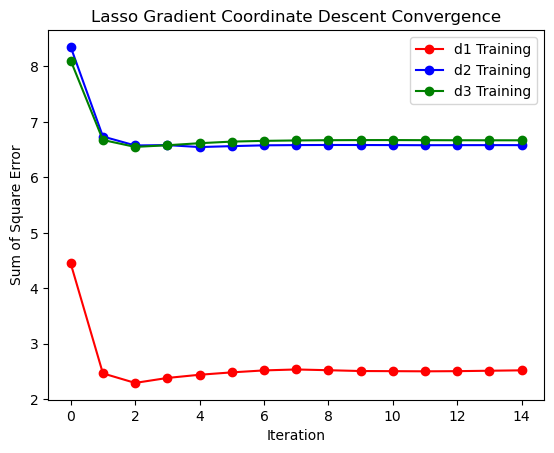

In [87]:
_, d1_obj_values = lcd_plot(d1_train, y1_train, lambda_d1, beta_0, iter = 15, tol = 1e-4)
_, d2_obj_values = lcd_plot(d2_train, y2_train, lambda_d2, beta_0, iter = 15, tol = 1e-4)
_, d3_obj_values = lcd_plot(d3_train, y3_train, lambda_d3, beta_0, iter = 15, tol = 1e-4)

plt.plot(d1_obj_values, marker='o', linestyle='-', color='red')
plt.plot(d2_obj_values, marker = 'o', linestyle = '-', color = 'blue')
plt.plot(d3_obj_values, marker = 'o', linestyle = '-', color = 'green')
plt.legend(['d1 Training', 'd2 Training', 'd3 Training'])
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Lasso Gradient Coordinate Descent Convergence")
plt.show()

# Part (b)

### Complile Datasets

In [109]:
#combine all datasets
comb_train = [d1_train, d2_train, d3_train]
comb_val = [d1_val, d2_val, d3_val]
comb_ytrain = [y1_train, y2_train, y3_train]
comb_yval = [y1_val, y2_val, y3_val]
num_total = d1_train.shape[0] + d2_train.shape[0] + d3_train.shape[0]
comb_lmb = [lambda_d1, lambda_d2, lambda_d3]


### Aggregate Lasso Coordinate Descent Algorithm

In [158]:
def aggregator(small_iter = 5, big_iter = 15, tol = 1e-6):
    comb_beta = np.zeros(d1_train.shape[1])
    obj_values = []
    for _ in range(big_iter):
        comb_beta_old = comb_beta.copy()
        beta_collect = []
        for i in range(len(comb_train)):
            beta_i = lasso_coordinate_descent(comb_train[i], comb_ytrain[i], comb_lmb[i], comb_beta, iter = small_iter, tol = 1e-4)
            beta_i = (comb_train[i].shape[0] / num_total) * beta_i
            beta_collect.append(beta_i)

        comb_beta = np.sum(beta_collect, axis = 0)
        obj_values.append(sse(test_X, test_y, comb_beta) )
        if np.linalg.norm(comb_beta - comb_beta_old) < tol:
            break
            
    return comb_beta, obj_values

### Run Algorithm

In [159]:
#blah
final_beta, final_obj_values = aggregator()

In [160]:
final_beta_10, final_10_obj_values = aggregator(small_iter = 10)

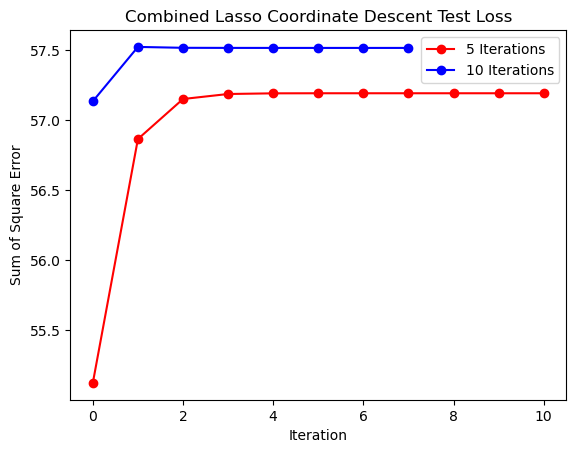

In [162]:
plt.plot(final_obj_values, marker='o', linestyle='-', color='red')
plt.plot(final_10_obj_values, marker = 'o', linestyle = '-', color = 'blue')
plt.legend(['5 Iterations', '10 Iterations'])
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Combined Lasso Coordinate Descent Test Loss")
plt.show()

### 1. Lambda used for each owner

In [154]:
print(f"From part a, the lambda used was found from minimizing the validation error, at: {comb_lmb} for dataset 1, 2, and 3 respectively")

From part a, the lambda used was found from minimizing the validation error, at: [36.0, 76.0, 76.0] for dataset 1, 2, and 3 respectively


### 2. Indices of the non-zero coefficients

In [136]:
print(f"Non-zero indices for final model (5 iterations): {np.where(final_beta != 0)[0]}")
print(f"Non-zero indices for final model (10 iterations): {np.where(final_beta_10 != 0)[0]}")

Non-zero indices for final model (5 iterations): [  2   3   4   5   6   8   9  11  13  14  15  16  18  20  24  25  26  32
  34  35  36  37  38  40  42  43  46  47  49  52  56  58  61  63  65  66
  68  71  73  76  77  78  79  80  82  83  85  90  91  92  93  94  96  97
  98 102 104 105 106 107 108 109 111 114 115 116 117 118 119 120 123 124
 125 126 128 129 130 131 132 133 134 135 136 137 138 140 144 147 148 153
 159 161 165 168 169 170 171 172 173 174 176 179 180 181 182 184 186 192
 193 199 201 202 204 205 207 208 209 210 212 213 216 219 220 223 224 225
 226 227 228 229 231 232 235 237 241 245 249 252 253 255 256 257 260 262
 263 266 267 268 269 270 272 274 275 276 277 279 280 281 283 284 285 287
 289 292 297 298 299 300 304 305 306 307 308 309 311 312 315 316 317 318
 321 322 323 324 325 326 329 332 333 337 340 342 343 344 345 350 351 352
 356 357 358 359 360 362 363 364 365 367 369 372 373 374 375 377 378 381
 385 387 388 389 391 393 396 399 400 402 403 405 406 407 408 411 412 413
 4

### 3. Confusion Matrix

In [151]:
def output_cm(p, a):
    pred_beta = (p != 0).astype(int)
    actual_beta = (a != 0).astype(int)

    cm = confusion_matrix(actual_beta, pred_beta)
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual non-zero'], columns=['Predicted 0', 'Predicted non-zero'])
    print(cm_df)    

        

In [152]:
print("-----5 Iterations-----")
output_cm(beta_d1, final_beta)
output_cm(beta_d2, final_beta)
output_cm(beta_d3, final_beta)

print("-----10 Iterations-----")
output_cm(beta_d1, final_beta_10)
output_cm(beta_d2, final_beta_10)
output_cm(beta_d3, final_beta_10)

-----5 Iterations-----
                 Predicted 0  Predicted non-zero
Actual 0                 251                   9
Actual non-zero          204                 136
                 Predicted 0  Predicted non-zero
Actual 0                 257                   3
Actual non-zero          216                 124
                 Predicted 0  Predicted non-zero
Actual 0                 259                   1
Actual non-zero          156                 184
-----10 Iterations-----
                 Predicted 0  Predicted non-zero
Actual 0                 267                  13
Actual non-zero          188                 132
                 Predicted 0  Predicted non-zero
Actual 0                 277                   3
Actual non-zero          196                 124
                 Predicted 0  Predicted non-zero
Actual 0                 277                   3
Actual non-zero          138                 182


### 4. Test Loss of Final Model

In [139]:
print(f"Test Loss of final model = {sse(test_X, test_y, final_beta)}")
print(f"Test Loss of final model = {sse(test_X, test_y, final_beta_2)}")

Test Loss of final model = 57.19251424939362
Test Loss of final model = 58.15334033618706
